### import libs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
import pickle

In [ ]:
warnings.filterwarnings(action="ignore")
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
%ls 2023_DSKUS/EDA/datasets

 45ed633d-f89e-4012-a8d2-c4a0f227034b_Data.csv
'45ed633d-f89e-4012-a8d2-c4a0f227034b_Series - Metadata.csv'
 83a82c17-b06a-41a6-acbd-37ed94cc017c_Data.csv
'83a82c17-b06a-41a6-acbd-37ed94cc017c_Series - Metadata.csv'
 API_DT.ODA.ALLD.CD_DS2_en_csv_v2_5362759.csv
 API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5358428.csv
 API_SI.POV.DDAY_DS2_en_csv_v2_5358982.csv
 API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv
 Cambodia-Thailand-Malaysia.csv
 country_code_dtls.csv
 latin_america_southeast_asia_usaid_complete.pickle
 Population_Growth_All.csv
 us_foreign_aid_complete.csv


### read data

In [ ]:
def readCsvFile(filepath):
    """
        Function to read csv file
        args:
            filepath : path to csv file
        return:
            df : dataframe
    """
    
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    df.drop(df.columns[-1], inplace=True, axis = 1)
    
    return df

In [ ]:
raw_aid_df = readCsvFile('2023_DSKUS/EDA/datasets/API_DT.ODA.ALLD.CD_DS2_en_csv_v2_5362759.csv')

In [ ]:
raw_aid_df.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.204000e+07,4.043000e+07,2.091000e+07,1.929000e+07,2.433000e+07,2.998000e+07,2.497000e+07,2.998000e+07,2.486000e+07,1.826000e+07,2.580000e+07,1.953000e+07,2.507000e+07,1.126000e+07,-7.380000e+06,1.150000e+07,-1.700000e+06,1.049000e+07,7.622000e+07,-1.132000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.915300e+08,5.639600e+08,6.889900e+08,8.048100e+08,1.265530e+09,1.871240e+09,1.689510e+09,2.117160e+09,2.778050e+09,3.852600e+09,4.669250e+09,4.549970e+09,4.830960e+09,4.704880e+09,4.588420e+09,5.459230e+09,6.289620e+09,7.560670e+09,8.521050e+09,8.447230e+09,1.048072e+10,1.019461e+10,1.141019e+10,1.029058e+10,1.031032e+10,1.080096e+10,8.218980e+09,8.028640e+09,7.679370e+09,7.481400e+09,7.995110e+09,8.510100e+09,1.140720e+10,1.652204e+10,1.624948e+10,1.641143e+10,1.845283e+10,2.048603e+10,2.367998e+10,2.514313e+10,2.497745e+10,2.853379e+10,2.622688e+10,2.920757e+10,2.590026e+10,2.549711e+10,2.506915e+10,2.788161e+10,2.752549e+10,3.020291e+10,NaN,NaN


In [ ]:
raw_infltn_df = readCsvFile("2023_DSKUS/EDA/datasets/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5358428.csv")

In [ ]:
raw_infltn_df.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.215560,6.311080,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,11.216471,14.238055,12.526893,15.06985,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,12.457914,17.678100,16.167612,13.135661,14.852815,12.288591,9.706586,10.249599,7.495256,7.819865,8.601485,5.840354,8.763754,7.449700,5.023421,8.558038,8.898164,8.450775,12.566645,8.954218,5.537538,8.971206,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,6.362961,6.079328


In [ ]:
raw_pvrty_df = readCsvFile("2023_DSKUS/EDA/datasets/API_SI.POV.DDAY_DS2_en_csv_v2_5358982.csv")

In [ ]:
raw_pvrty_df.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_unemplmnt_df = readCsvFile("2023_DSKUS/EDA/datasets/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv")

In [ ]:
raw_unemplmnt_df.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.333336,7.318747,7.242706,7.160694,7.063796,7.055998,7.090541,7.060097,7.015272,6.939536,6.850376,6.803537,6.741241,6.535173,6.373503,6.347598,6.283421,6.232561,6.295587,6.933645,6.715358,6.599356,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219


In [ ]:
cntry_code_dtl = readCsvFile('2023_DSKUS/EDA/datasets/country_code_dtls.csv')

In [ ]:
cntry_code_dtl.head(2)

,country_code,region,incomegroup,specialnotes,tablename
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern


### transform tables

In [ ]:
raw_aid_df.dtypes

country_name       object
country_code       object
indicator_name     object
indicator_code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Length: 66, dtype: object

In [ ]:
cntry_code_dtl.dtypes

country_code    object
region          object
incomegroup     object
specialnotes    object
tablename       object
dtype: object

In [ ]:
# join all tables with country_code

aid_df = raw_aid_df.merge(cntry_code_dtl, how = 'left', on = "country_code")
inflation_df = raw_infltn_df.merge(cntry_code_dtl, how = "left", on = "country_code")
povrty_df = raw_pvrty_df.merge(cntry_code_dtl, how = 'left', on = "country_code")
unemplmnt_df = raw_unemplmnt_df.merge(cntry_code_dtl, how = 'left', on = "country_code")

In [ ]:
aid_df.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,region,incomegroup,specialnotes,tablename
0,Aruba,ABW,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.204000e+07,4.043000e+07,2.091000e+07,1.929000e+07,2.433000e+07,2.998000e+07,2.497000e+07,2.998000e+07,2.486000e+07,1.826000e+07,2.580000e+07,1.953000e+07,2.507000e+07,1.126000e+07,-7.380000e+06,1.150000e+07,-1.700000e+06,1.049000e+07,7.622000e+07,-1.132000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba
1,Africa Eastern and Southern,AFE,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.915300e+08,5.639600e+08,6.889900e+08,8.048100e+08,1.265530e+09,1.871240e+09,1.689510e+09,2.117160e+09,2.778050e+09,3.852600e+09,4.669250e+09,4.549970e+09,4.830960e+09,4.704880e+09,4.588420e+09,5.459230e+09,6.289620e+09,7.560670e+09,8.521050e+09,8.447230e+09,1.048072e+10,1.019461e+10,1.141019e+10,1.029058e+10,1.031032e+10,1.080096e+10,8.218980e+09,8.028640e+09,7.679370e+09,7.481400e+09,7.995110e+09,8.510100e+09,1.140720e+10,1.652204e+10,1.624948e+10,1.641143e+10,1.845283e+10,2.048603e+10,2.367998e+10,2.514313e+10,2.497745e+10,2.853379e+10,2.622688e+10,2.920757e+10,2.590026e+10,2.549711e+10,2.506915e+10,2.788161e+10,2.752549e+10,3.020291e+10,NaN,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern


In [ ]:
aid_df['indicator_name'].unique()

array(['Net official development assistance and official aid received (current US$)'],
      dtype=object)

In [ ]:
cntry_code_dtl

,country_code,region,incomegroup,specialnotes,tablename
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
263,ZMB,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia


In [ ]:
aid_df.region.value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: region, dtype: int64

In [ ]:
ID_VARS = ['country_name', 'country_code', 'indicator_name', 'indicator_code',
       'region', 'incomegroup', 'specialnotes', 'tablename']

In [ ]:
aid_with_codes_df = aid_df.melt(id_vars=ID_VARS, 
        var_name="Year", 
        value_name="Value")
aid_with_codes_df.head(3)

,country_name,country_code,indicator_name,indicator_code,region,incomegroup,specialnotes,tablename,Year,Value
0,Aruba,ABW,Net official development assistance and offici...,DT.ODA.ALLD.CD,Latin America & Caribbean,High income,NaN,Aruba,1960,NaN
1,Africa Eastern and Southern,AFE,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,1960,NaN
2,Afghanistan,AFG,Net official development assistance and offici...,DT.ODA.ALLD.CD,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,1960,1.718000e+07


In [ ]:
povrty_with_codes_df = povrty_df.melt(id_vars=ID_VARS, 
              var_name = "Year", 
              value_name = "Value")
povrty_with_codes_df.query('Value.notnull()').head() #filtering out the null values

,country_name,country_code,indicator_name,indicator_code,region,incomegroup,specialnotes,tablename,Year,Value
2209,United Kingdom,GBR,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,Europe & Central Asia,High income,NaN,United Kingdom,1968,0.2
2475,United Kingdom,GBR,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,Europe & Central Asia,High income,NaN,United Kingdom,1969,0.2
2737,France,FRA,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,Europe & Central Asia,High income,The following irrevocable euro conversion rate...,France,1970,0.0
2741,United Kingdom,GBR,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,Europe & Central Asia,High income,NaN,United Kingdom,1970,0.0
2961,Canada,CAN,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,North America,High income,Fiscal year end: March 31; reporting period fo...,Canada,1971,2.2


In [ ]:
inflation_with_codes_df = inflation_df.melt(id_vars=ID_VARS, 
              var_name = "Year", 
              value_name = "Value")
inflation_with_codes_df.tail()

,country_name,country_code,indicator_name,indicator_code,region,incomegroup,specialnotes,tablename,Year,Value
16487,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Europe & Central Asia,Upper middle income,NaN,Kosovo,2021,3.353691
16488,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",2021,NaN
16489,South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,2021,4.611672
16490,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia,2021,22.021234
16491,Zimbabwe,ZWE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Sub-Saharan Africa,Lower middle income,National Accounts data are reported in Zimbabw...,Zimbabwe,2021,98.546105


## poc

In [ ]:
inflation_cols = ['country_name','country_code','region','incomegroup','Year']

In [ ]:
tran_inflation_df = inflation_with_codes_df.pivot_table(index=inflation_cols, columns='indicator_name',\
                                    aggfunc='first', values='Value').reset_index().rename_axis(None, axis=1)
print('shape of the data frame {}'.format(inflation_df.shape))
tran_inflation_df.head()

shape of the data frame (266, 70)


,country_name,country_code,region,incomegroup,Year,"Inflation, consumer prices (annual %)"
0,Afghanistan,AFG,South Asia,Low income,2005,12.686269
1,Afghanistan,AFG,South Asia,Low income,2006,6.784597
2,Afghanistan,AFG,South Asia,Low income,2007,8.680571
3,Afghanistan,AFG,South Asia,Low income,2008,26.418664
4,Afghanistan,AFG,South Asia,Low income,2009,-6.811161


In [ ]:
unemplmnt_with_codes_df = unemplmnt_df.melt(id_vars=ID_VARS, 
              var_name = "Year", 
              value_name = "Value")
unemplmnt_with_codes_df.head(3)

,country_name,country_code,indicator_name,indicator_code,region,incomegroup,specialnotes,tablename,Year,Value
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Latin America & Caribbean,High income,NaN,Aruba,1960,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,1960,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,1960,NaN


In [ ]:
trans_unemployment_with_codes_df = unemplmnt_with_codes_df.pivot_table(index=inflation_cols, columns='indicator_name',\
                                    aggfunc='first', values='Value').reset_index().rename_axis(None, axis=1)
print('shape of the data frame {}'.format(trans_unemployment_with_codes_df.shape))
trans_unemployment_with_codes_df.head()

shape of the data frame (5764, 6)


,country_name,country_code,region,incomegroup,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,South Asia,Low income,1991,8.121
1,Afghanistan,AFG,South Asia,Low income,1992,8.168
2,Afghanistan,AFG,South Asia,Low income,1993,8.123
3,Afghanistan,AFG,South Asia,Low income,1994,8.111
4,Afghanistan,AFG,South Asia,Low income,1995,8.260


In [ ]:
trans_povrty_with_codes_df  = povrty_with_codes_df.pivot_table(index=inflation_cols, columns='indicator_name',\
                                    aggfunc='first', values='Value').reset_index().rename_axis(None, axis=1)
print('shape of the data frame {}'.format(trans_povrty_with_codes_df.shape))
trans_povrty_with_codes_df.head()

shape of the data frame (1937, 6)


,country_name,country_code,region,incomegroup,Year,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)
0,Albania,ALB,Europe & Central Asia,Upper middle income,1996,0.5
1,Albania,ALB,Europe & Central Asia,Upper middle income,2002,1.1
2,Albania,ALB,Europe & Central Asia,Upper middle income,2005,0.6
3,Albania,ALB,Europe & Central Asia,Upper middle income,2008,0.2
4,Albania,ALB,Europe & Central Asia,Upper middle income,2012,0.6


In [ ]:
trans_aid_with_codes_df = aid_with_codes_df.pivot_table(index=inflation_cols, columns='indicator_name',\
                                    aggfunc='first', values='Value').reset_index().rename_axis(None, axis=1)
print('shape of the data frame {}'.format(trans_aid_with_codes_df.shape))
trans_aid_with_codes_df.head()

shape of the data frame (8857, 6)


,country_name,country_code,region,incomegroup,Year,Net official development assistance and official aid received (current US$)
0,Afghanistan,AFG,South Asia,Low income,1960,1.718000e+07
1,Afghanistan,AFG,South Asia,Low income,1961,3.467000e+07
2,Afghanistan,AFG,South Asia,Low income,1962,1.693000e+07
3,Afghanistan,AFG,South Asia,Low income,1963,3.667000e+07
4,Afghanistan,AFG,South Asia,Low income,1964,4.617000e+07


In [ ]:
#import functools
dfs = [tran_inflation_df, trans_unemployment_with_codes_df, trans_povrty_with_codes_df , trans_aid_with_codes_df]

#merged_df = functools.reduce(lambda left, right: pd.merge(left, right, on='country_code'), dfs)
merged_df = pd.concat(dfs)

In [ ]:
merged_df.tail()

,country_name,country_code,region,incomegroup,Year,"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Net official development assistance and official aid received (current US$)
8852,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2017,NaN,NaN,NaN,7.258400e+08
8853,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,NaN,NaN,NaN,7.945600e+08
8854,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2019,NaN,NaN,NaN,8.440900e+08
8855,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2020,NaN,NaN,NaN,9.846000e+08
8856,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2021,NaN,NaN,NaN,9.743900e+08


In [ ]:
filter = (merged_df['Inflation, consumer prices (annual %)'].notnull()) \
              & (merged_df['Net official development assistance and official aid received (current US$)'].notnull()) \
              & (merged_df['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].notnull()) \
              & (merged_df['Unemployment, total (% of total labor force) (modeled ILO estimate)'].notnull())

merged_df[filter].head()

,country_name,country_code,region,incomegroup,Year,"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Net official development assistance and official aid received (current US$)


In [ ]:
filter = (merged_df['Net official development assistance and official aid received (current US$)'].notnull()) \
              & (merged_df['Unemployment, total (% of total labor force) (modeled ILO estimate)'].notnull())

merged_df[filter].head()

,country_name,country_code,region,incomegroup,Year,"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Net official development assistance and official aid received (current US$)


# EDA

In [ ]:
# unique regions
aid_with_codes_df['region'].unique()

array(['Latin America & Caribbean', nan, 'South Asia',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

In [ ]:
# countries in latin america
aid_with_codes_df[aid_with_codes_df.region.isin(['Latin America & Caribbean'])]['country_name'].unique()

array(['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas, The',
       'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Grenada', 'Guatemala', 'Guyana',
       'Honduras', 'Haiti', 'Jamaica', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Martin (French part)', 'Mexico', 'Nicaragua', 'Panama',
       'Peru', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands',
       'Trinidad and Tobago', 'Uruguay', 'St. Vincent and the Grenadines',
       'Venezuela, RB', 'British Virgin Islands', 'Virgin Islands (U.S.)'],
      dtype=object)

In [ ]:
# countries in East Asia & pacific
aid_with_codes_df[aid_with_codes_df.region.isin(['East Asia & Pacific'])]['country_name'].unique()

array(['American Samoa', 'Australia', 'Brunei Darussalam', 'China',
       'Fiji', 'Micronesia, Fed. Sts.', 'Guam', 'Hong Kong SAR, China',
       'Indonesia', 'Japan', 'Cambodia', 'Kiribati', 'Korea, Rep.',
       'Lao PDR', 'Macao SAR, China', 'Marshall Islands', 'Myanmar',
       'Mongolia', 'Northern Mariana Islands', 'Malaysia',
       'New Caledonia', 'Nauru', 'New Zealand', 'Philippines', 'Palau',
       'Papua New Guinea', "Korea, Dem. People's Rep.",
       'French Polynesia', 'Singapore', 'Solomon Islands', 'Thailand',
       'Timor-Leste', 'Tonga', 'Tuvalu', 'Vietnam', 'Vanuatu', 'Samoa'],
      dtype=object)


Manual filtering on countries is required.

## Latin America

In [ ]:
def plottingTimeSeries(df, filter_criteria=None, region = "Latin America & Caribbean"):
    """
        Function to plot time series data
        args:
            df : dataframe
            filter_criteria : dataframe filter in format of pd.query (default, None)
            region : filter for region (default, Latin america & Caribbean)
        
        return:
            plot : time series plot
    """
    
    ax = sns.lineplot(x = "Year", 
                       y = "Value",
                       data = df.query(filter_criteria).groupby("Year")\
                               .agg({'Value':np.nanmean}).reset_index()
                        )
    return ax

### Poverty

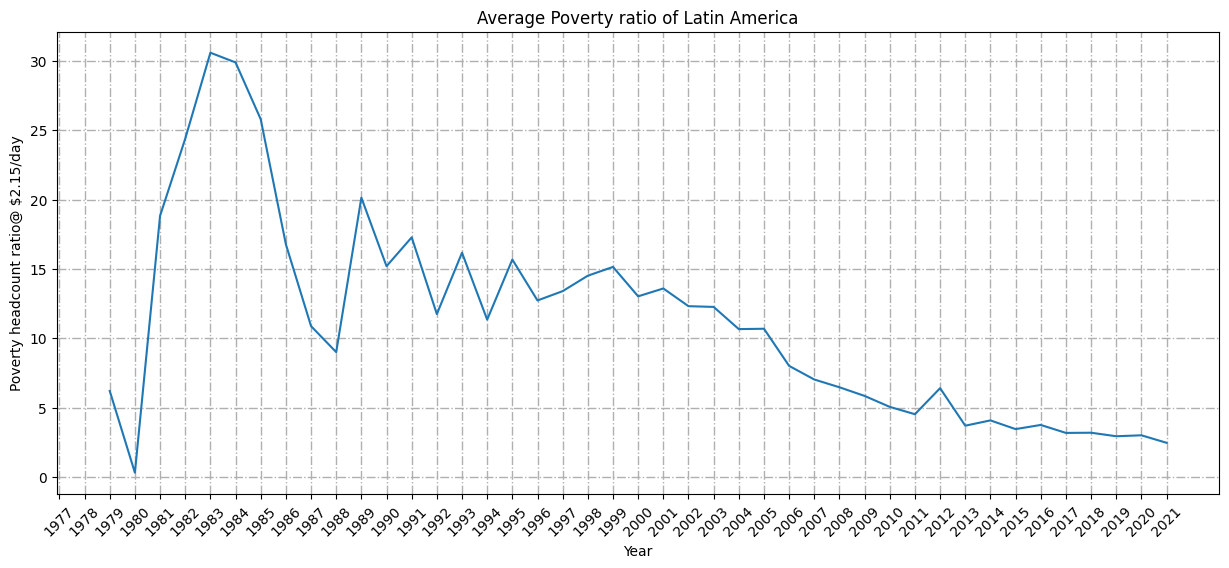

In [ ]:
plt.figure(figsize=(15, 6))
plottingTimeSeries(povrty_with_codes_df, filter_criteria="region == 'Latin America & Caribbean'")
plt.xticks(rotation=45)
plt.ylabel("Poverty headcount ratio@ $2.15/day")
plt.grid(linestyle='-.', linewidth=1)
plt.title("Average Poverty ratio of Latin America")
plt.show()

## Foreign aid (total)

In [ ]:
aid_with_codes_df['indicator_name'].unique()

array(['Net official development assistance and official aid received (current US$)'],
      dtype=object)

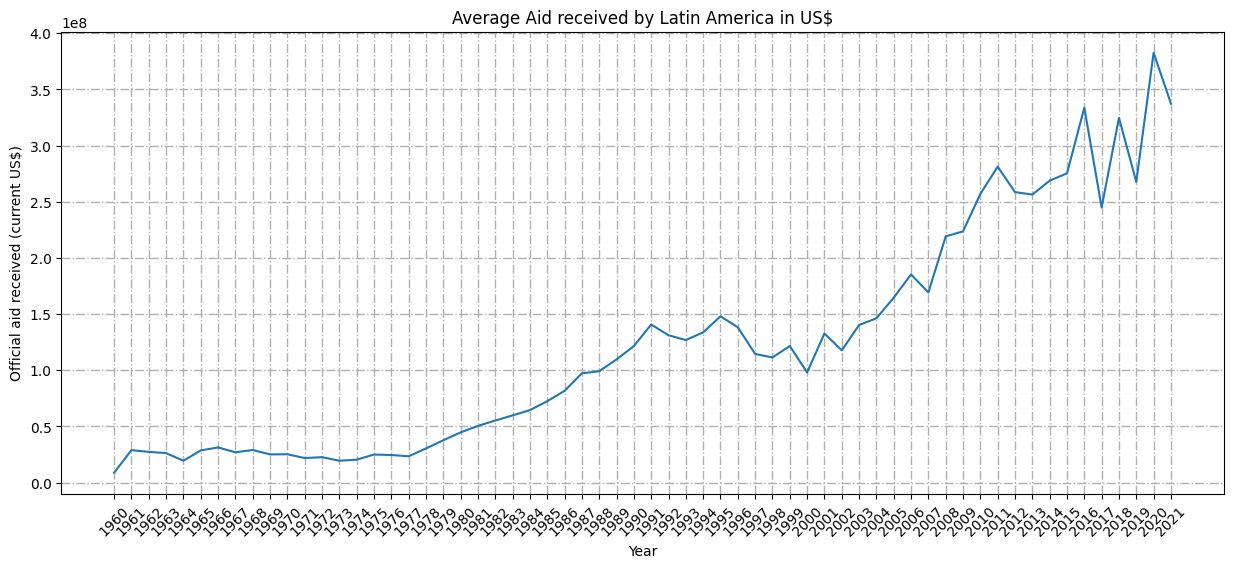

In [ ]:
plt.figure(figsize=(15, 6))
plottingTimeSeries(aid_with_codes_df, filter_criteria="region == 'Latin America & Caribbean'")
plt.xticks(rotation=45)
plt.ylabel("Official aid received (current US$)")
plt.grid(linestyle='-.', linewidth=1)
plt.title("Average Aid received by Latin America in US$")
plt.show()

## Unemployment rate

In [ ]:
unemplmnt_with_codes_df.head(2)

,country_name,country_code,indicator_name,indicator_code,region,incomegroup,specialnotes,tablename,Year,Value
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Latin America & Caribbean,High income,NaN,Aruba,1960,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,1960,NaN


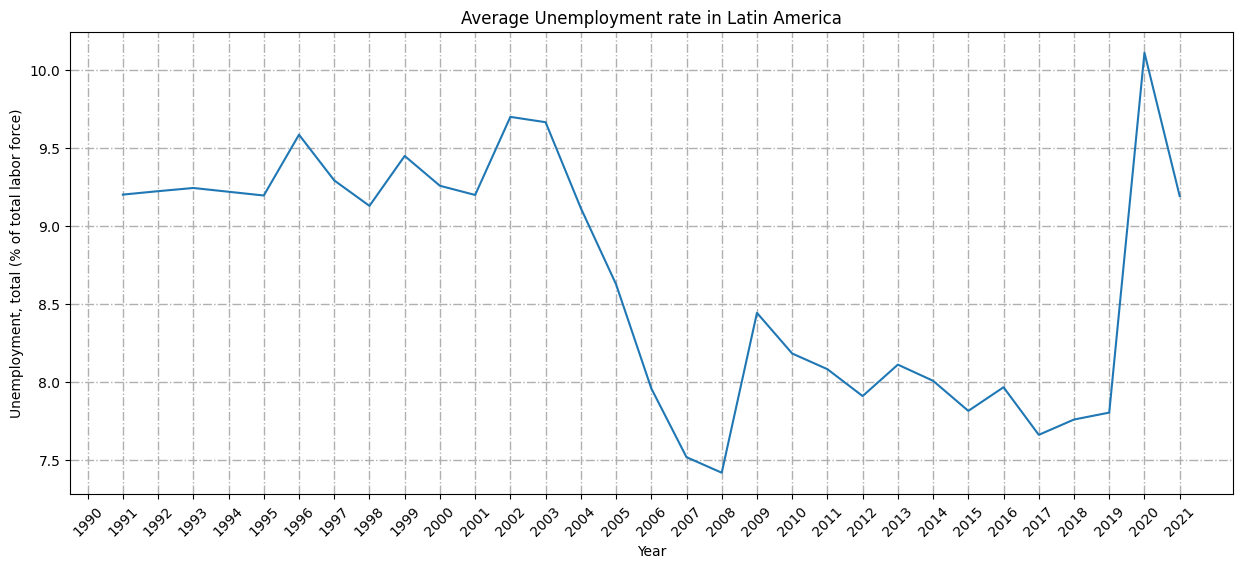

In [ ]:
plt.figure(figsize=(15, 6))
plottingTimeSeries(unemplmnt_with_codes_df, filter_criteria="region == 'Latin America & Caribbean'")
plt.xticks(rotation=45)
plt.ylabel("Unemployment, total (% of total labor force)")
plt.grid(linestyle='-.', linewidth=1)
plt.title("Average Unemployment rate in Latin America")
plt.show()

## Aid impact towards unemployment rate

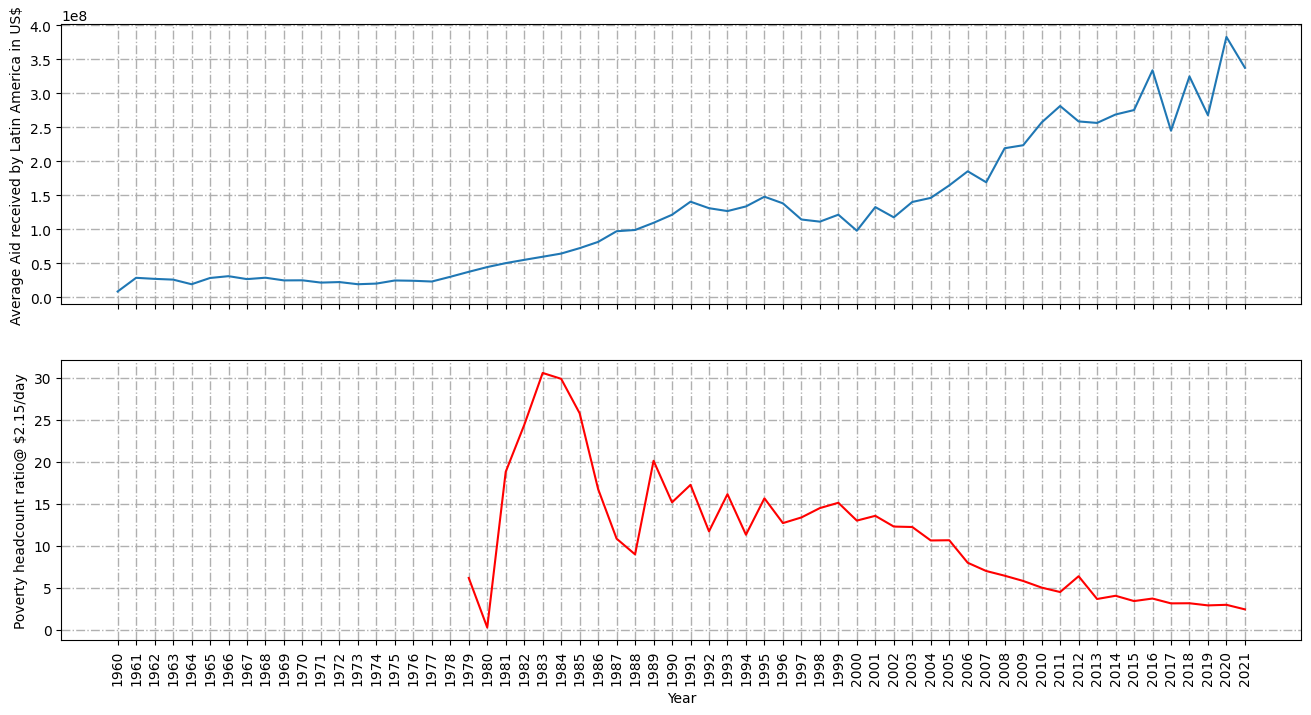

In [ ]:
f, axarr = plt.subplots(2, figsize=(16,8), sharex=True)
sns.lineplot(x = "Year", 
                       y = "Value",
                       data = povrty_with_codes_df.query("region == 'Latin America & Caribbean'")\
                               .groupby("Year")\
                               .agg({'Value':np.nanmean}).reset_index(),ax=axarr[1], color = "r")
axarr[1].set_ylabel('Poverty headcount ratio@ $2.15/day')
axarr[1].grid(linestyle="-.", linewidth=1)

sns.lineplot(x = "Year", 
                       y = "Value",
                       data = aid_with_codes_df.query("region == 'Latin America & Caribbean'")\
                               .groupby("Year")\
                               .agg({'Value':np.nanmean}).reset_index(),ax=axarr[0])
axarr[0].set_ylabel("Average Aid received by Latin America in US$")
axarr[1].tick_params(axis='x', rotation=90)
axarr[0].grid(linestyle="-.", linewidth=1)


plt.show()

Poverty rate started dropping after 2001. The average US aid also increased after during the same period. 

Could this possibly mean that US Aid towards Latin America had a significant impact on reducing the Poverty rate?

*Lets* try by breaking down the US Aid into different sectors, given to Latin America during the same period.

# US Aid Complete Dataset

In [ ]:
with open("2023_DSKUS/EDA/datasets/latin_america_southeast_asia_usaid_complete.pickle", "rb") as file_:
    raw_us_aid = pickle.load(file_)

In [ ]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America


In [ ]:
raw_us_aid['aid_type_group_name'].value_counts()

Project-Type            358619
Administrative Costs    207369
Technical Assistance     71730
Core contributions        2090
Other                       10
Budget support               2
Name: aid_type_group_name, dtype: int64

In [ ]:
raw_us_aid['international_category_name'].value_counts()

Administrative Costs     207738
Governance               169340
Health and Population     87452
Other                     54105
Humanitarian              32061
Education                 25062
Agriculture               23788
Commodity Assistance      17261
Economic Growth           17096
Infrastructure             5917
Name: international_category_name, dtype: int64

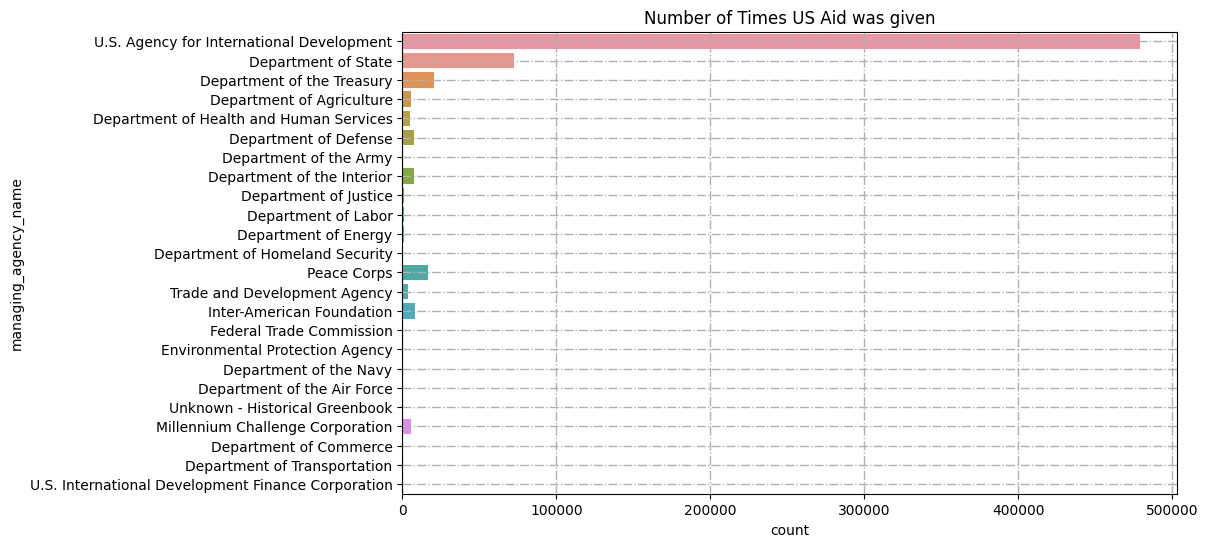

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y = "managing_agency_name", data = raw_us_aid)
plt.grid(linestyle = "-.", linewidth=1)
plt.title("Number of Times US Aid was given")
plt.show()

<Axes: xlabel='transaction_type_name', ylabel='count'>

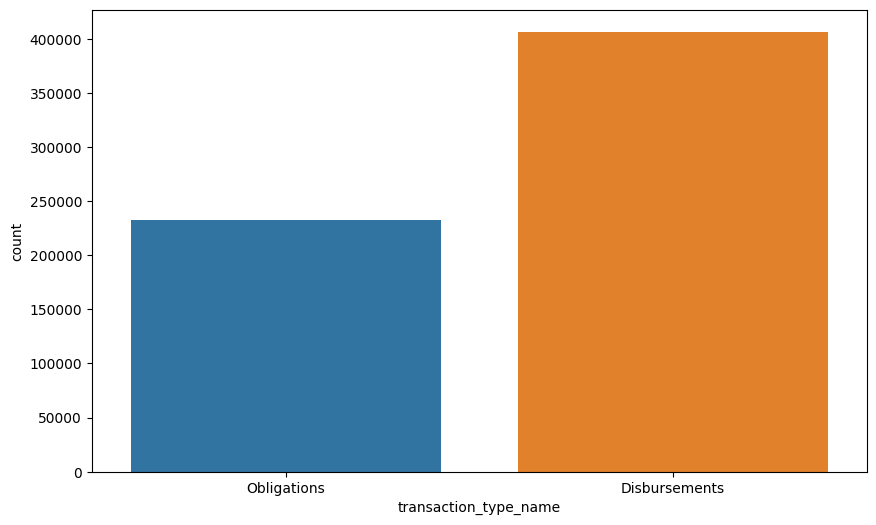

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "transaction_type_name", data = raw_us_aid)

In [ ]:
raw_us_aid.country_name.unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Brunei', 'Burma (Myanmar)',
       'Cambodia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'French Guiana',
       'Guatemala', 'Haiti', 'Honduras', 'Indonesia', 'Laos', 'Malaysia',
       'Martinique', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Timor-Leste', 'Singapore', 'Vietnam', 'Thailand',
       'Uruguay', 'Venezuela'], dtype=object)

## filter on Year (latest data)

In [ ]:
raw_us_aid['fiscal_year'] = np.where(raw_us_aid.fiscal_year=="1976tq", "1976", raw_us_aid.fiscal_year)
#raw_us_aid['fiscal_year'] 

In [ ]:
raw_us_aid['fiscal_year'] = raw_us_aid['fiscal_year'].astype(int)

In [ ]:
raw_us_aid.fiscal_year.min(), raw_us_aid.fiscal_year.max()

(1946, 2023)

In [ ]:
# aid in millions
raw_us_aid['amount_in_mil'] = (raw_us_aid['constant_dollar_amount'].astype(float)/1000000).round(2)

In [ ]:
latest_us_aid = raw_us_aid.query("fiscal_year == 2022")

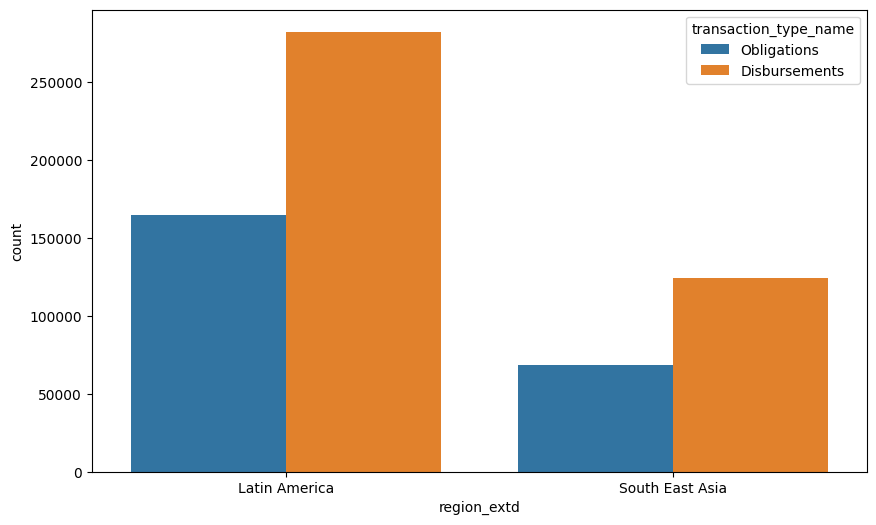

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "region_extd", data = raw_us_aid, hue = "transaction_type_name")
plt.show()
# plt.title()

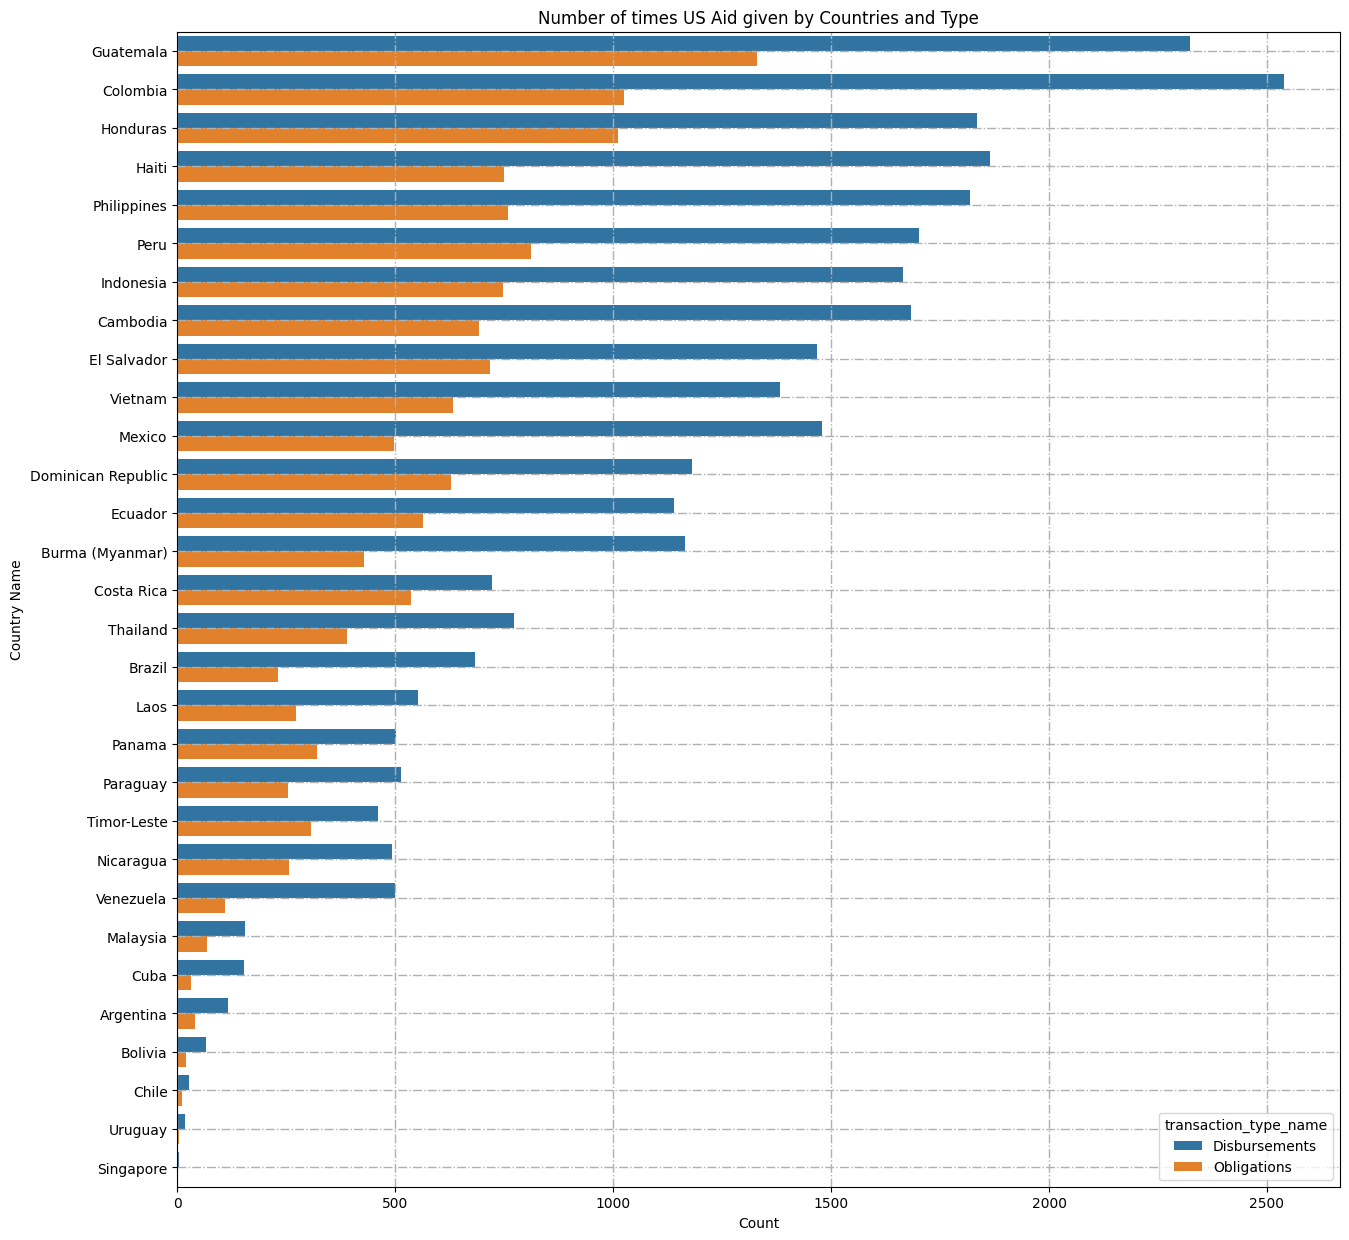

In [ ]:
plt.figure(figsize=(15, 15))
sns.countplot(y = "country_name", 
             data = latest_us_aid, 
             hue="transaction_type_name", 
             order = latest_us_aid['country_name'].value_counts().index)
plt.ylabel("Country Name")
plt.xlabel("Count")
plt.title("Number of times US Aid given by Countries and Type")
plt.grid(linestyle = "-.", linewidth=1)

In [ ]:
latest_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
88,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,1,Government,1,Government - United States,1000004,U.S. Government - Department of State,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,312738,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,20730110299,NaN,NaN,2021-10-07,3,Disbursements,2022,07OCT2021,6430,6209,101320,110,1,,Latin America,0.01
91,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,1,Government,1,Government - United States,1000010,U.S. Government - Department of Justice,3,Governance,152,"Conflict, Peace, and Security",15210,Security system management and reform,1,Peace and Security,45,Peace and Security - General,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,3,Project-Type,8,Project-type interventions - not Investment Re...,312483,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,102507301,NaN,NaN,2021-10-01,2,Obligations,2022,01OCT2021,-12572,-12139,101065,110,1,,Latin America,-0.01


In [ ]:
# there are outliers in data (constant_dollar_amount in negative)
# lets remove everything after 12 percentile

latest_us_aid = latest_us_aid[latest_us_aid.constant_dollar_amount >= latest_us_aid.constant_dollar_amount.quantile(.125)]

In [ ]:
# aid in millions
latest_us_aid['amount_in_mil'] = (latest_us_aid['constant_dollar_amount'].astype(float)/1000000).round(2)

In [ ]:
plot_df = latest_us_aid.groupby(["region_extd", "country_name" ,'transaction_type_name'])\
                        .agg({"amount_in_mil":np.nanmean}).reset_index()
plot_df.head()

,region_extd,country_name,transaction_type_name,amount_in_mil
0,Latin America,Argentina,Disbursements,0.029570
1,Latin America,Argentina,Obligations,0.070286
2,Latin America,Bolivia,Disbursements,0.094769
3,Latin America,Bolivia,Obligations,0.221765
4,Latin America,Brazil,Disbursements,0.079399


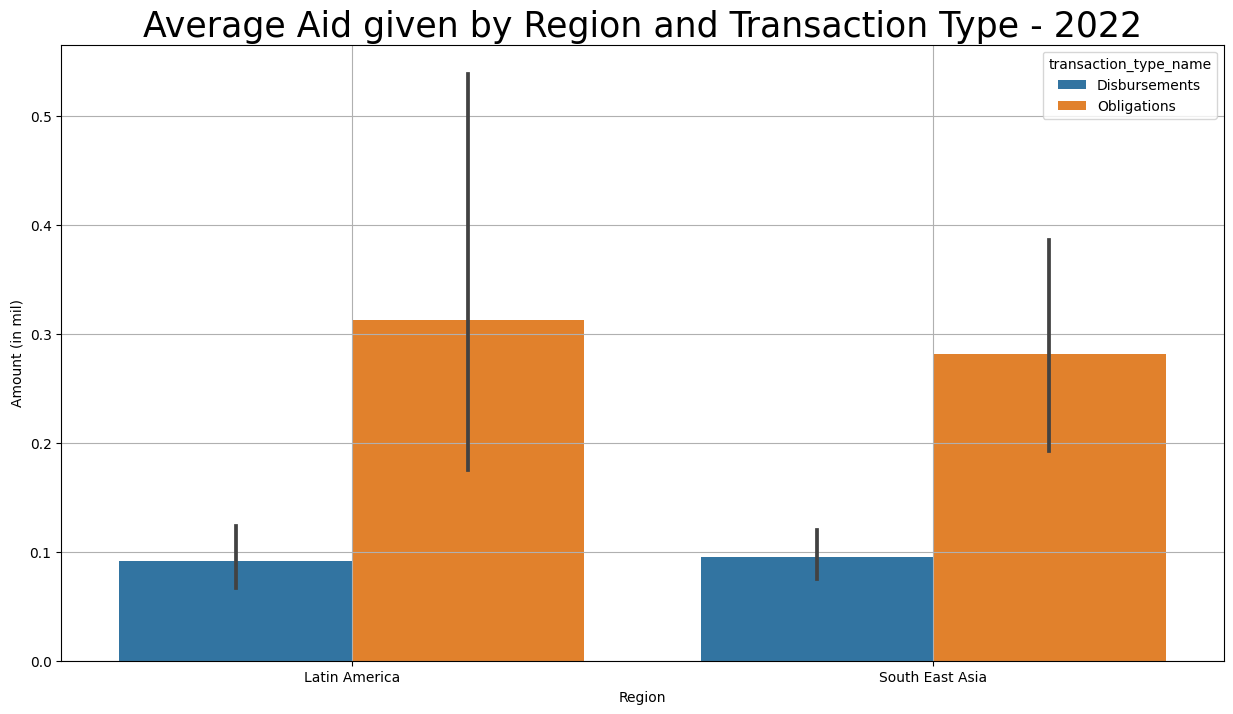

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x = "region_extd", 
            y = "amount_in_mil",
            data = plot_df, hue = "transaction_type_name")
plt.grid()
plt.ylabel("Amount (in mil)")
plt.xlabel("Region")
plt.title("Average Aid given by Region and Transaction Type - 2022", fontsize=25)
plt.show()

Text(0.5, 1.0, 'Average Aid given in Latin America by Transaction Type - 2022')

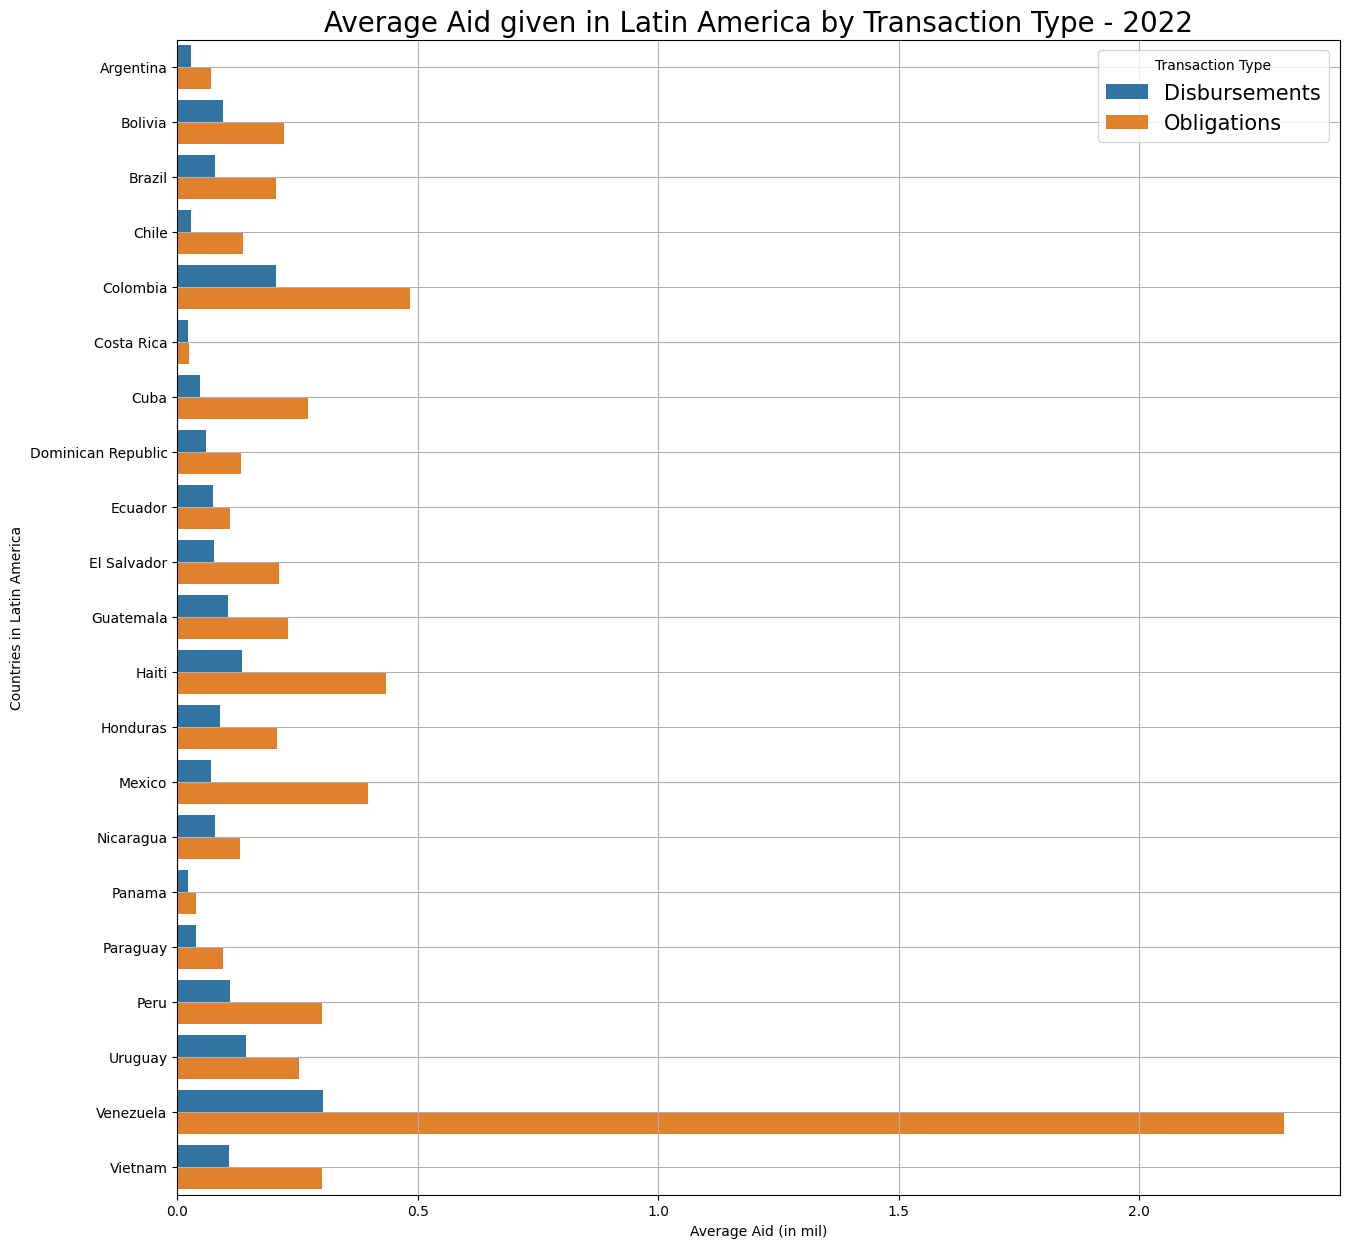

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x = "amount_in_mil", 
                       y = "country_name",
                       data = plot_df[plot_df.region_extd=="Latin America"],
            hue = "transaction_type_name")
plt.ylabel('Countries in Latin America')
plt.xlabel('Average Aid (in mil)')
plt.grid()
plt.legend(loc=1, prop={'size': 15}, title = "Transaction Type")
plt.title("Average Aid given in Latin America by Transaction Type - 2022", fontsize=20)

Text(0.5, 1.0, 'Average Aid given in South-East Asia by Transaction Type - 2022')

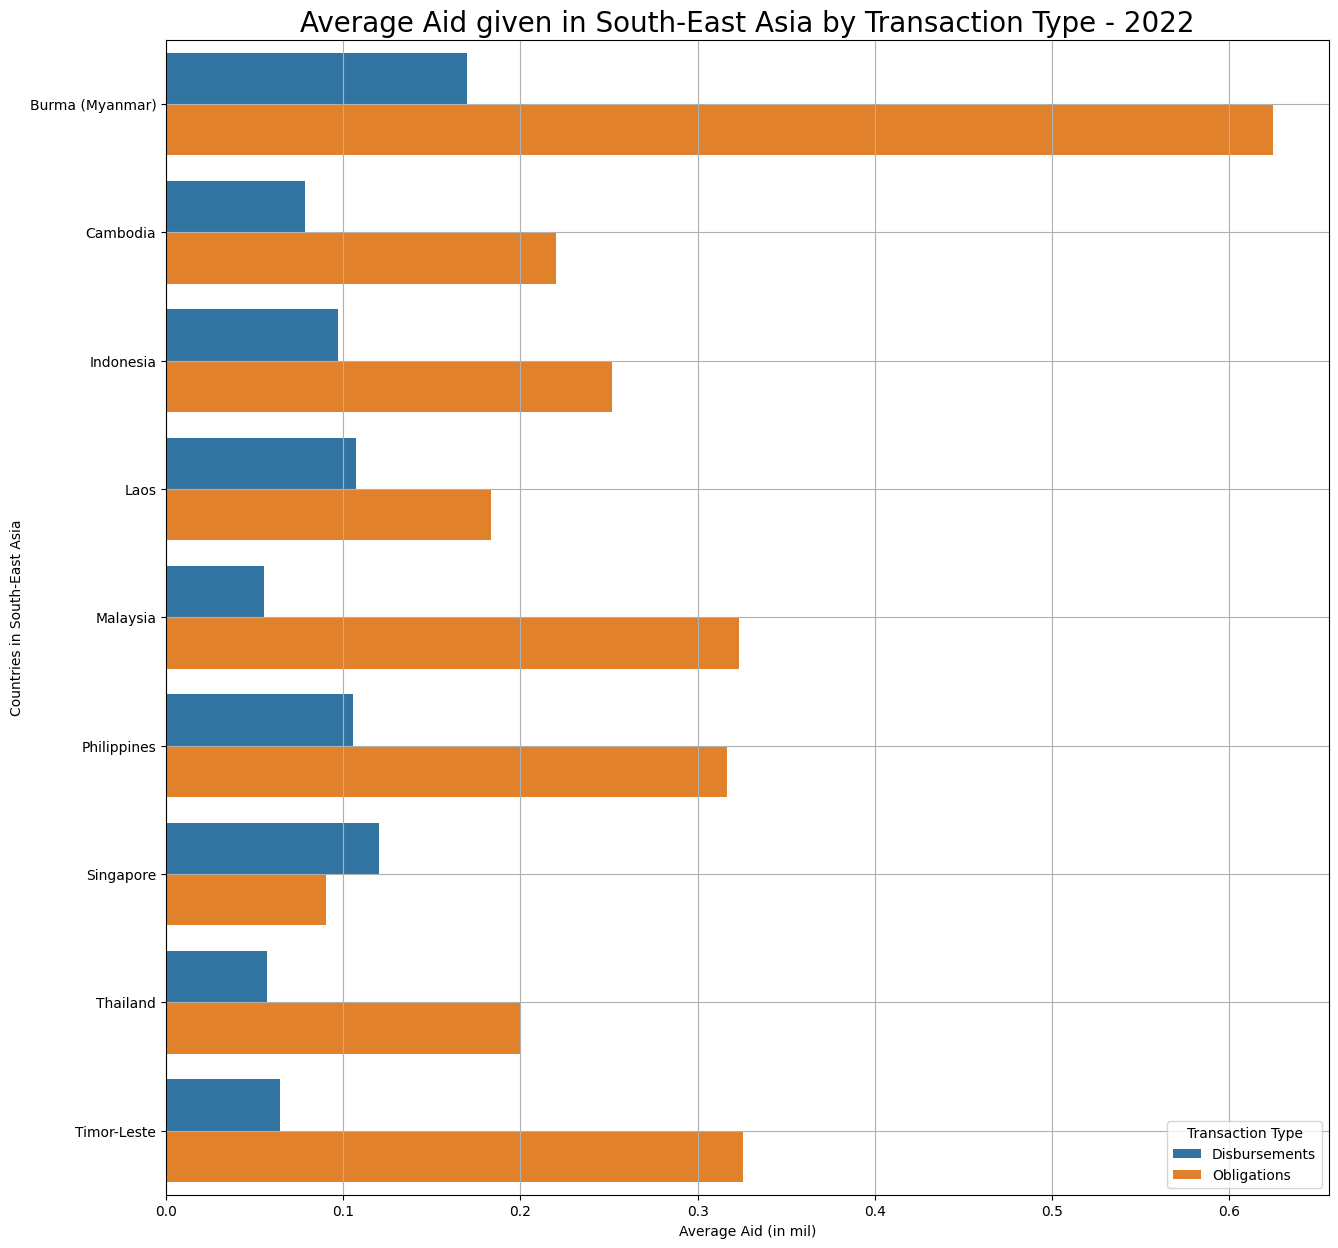

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x = "amount_in_mil", 
                       y = "country_name",
                       data = plot_df[plot_df.region_extd=="South East Asia"],
            hue = "transaction_type_name")
plt.ylabel('Countries in South-East Asia')
plt.xlabel('Average Aid (in mil)')
plt.grid()
plt.legend(loc="best", prop={'size': 10}, title="Transaction Type")
plt.title("Average Aid given in South-East Asia by Transaction Type - 2022", fontsize=20)

## Disbursement across account type

In [ ]:
latest_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
88,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,1,Government,1,Government - United States,1000004,U.S. Government - Department of State,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,312738,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,20730110299,NaN,NaN,2021-10-07,3,Disbursements,2022,07OCT2021,6430,6209,101320,110,1,,Latin America,0.01
101,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,8,Enterprises,19,Enterprises - United States,3990208,Enterprise - United States Redacted,3,Governance,151,Government and Civil Society,15130,Legal and judicial development,2,"Democracy, Human Rights, and Governance",7,Rule of Law and Human Rights,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,3,Project-Type,8,Project-type interventions - not Investment Re...,318543,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,19AR2021K0252,NaN,NaN,2021-10-25,3,Disbursements,2022,25OCT2021,286,276,107125,110,1,,Latin America,0.00


In [ ]:
plot_df = raw_us_aid.groupby(['us_category_name', 'fiscal_year','region_extd'])\
                .agg({'amount_in_mil':np.nanmean}).reset_index()
plot_df.head()

,us_category_name,fiscal_year,region_extd,amount_in_mil
0,"Democracy, Human Rights, and Governance",1988,Latin America,6.543125
1,"Democracy, Human Rights, and Governance",1988,South East Asia,4.387500
2,"Democracy, Human Rights, and Governance",1989,Latin America,5.949375
3,"Democracy, Human Rights, and Governance",1989,South East Asia,2.092500
4,"Democracy, Human Rights, and Governance",1990,Latin America,2.147000


In [ ]:
plot_df.head()

,us_category_name,fiscal_year,region_extd,amount_in_mil
0,"Democracy, Human Rights, and Governance",1988,Latin America,6.543125
1,"Democracy, Human Rights, and Governance",1988,South East Asia,4.387500
2,"Democracy, Human Rights, and Governance",1989,Latin America,5.949375
3,"Democracy, Human Rights, and Governance",1989,South East Asia,2.092500
4,"Democracy, Human Rights, and Governance",1990,Latin America,2.147000


In [ ]:
plot_df.shape

(642, 4)

Text(0.5, 1.0, 'Average US Aid to Latin America by Category : 2001 - 2022')

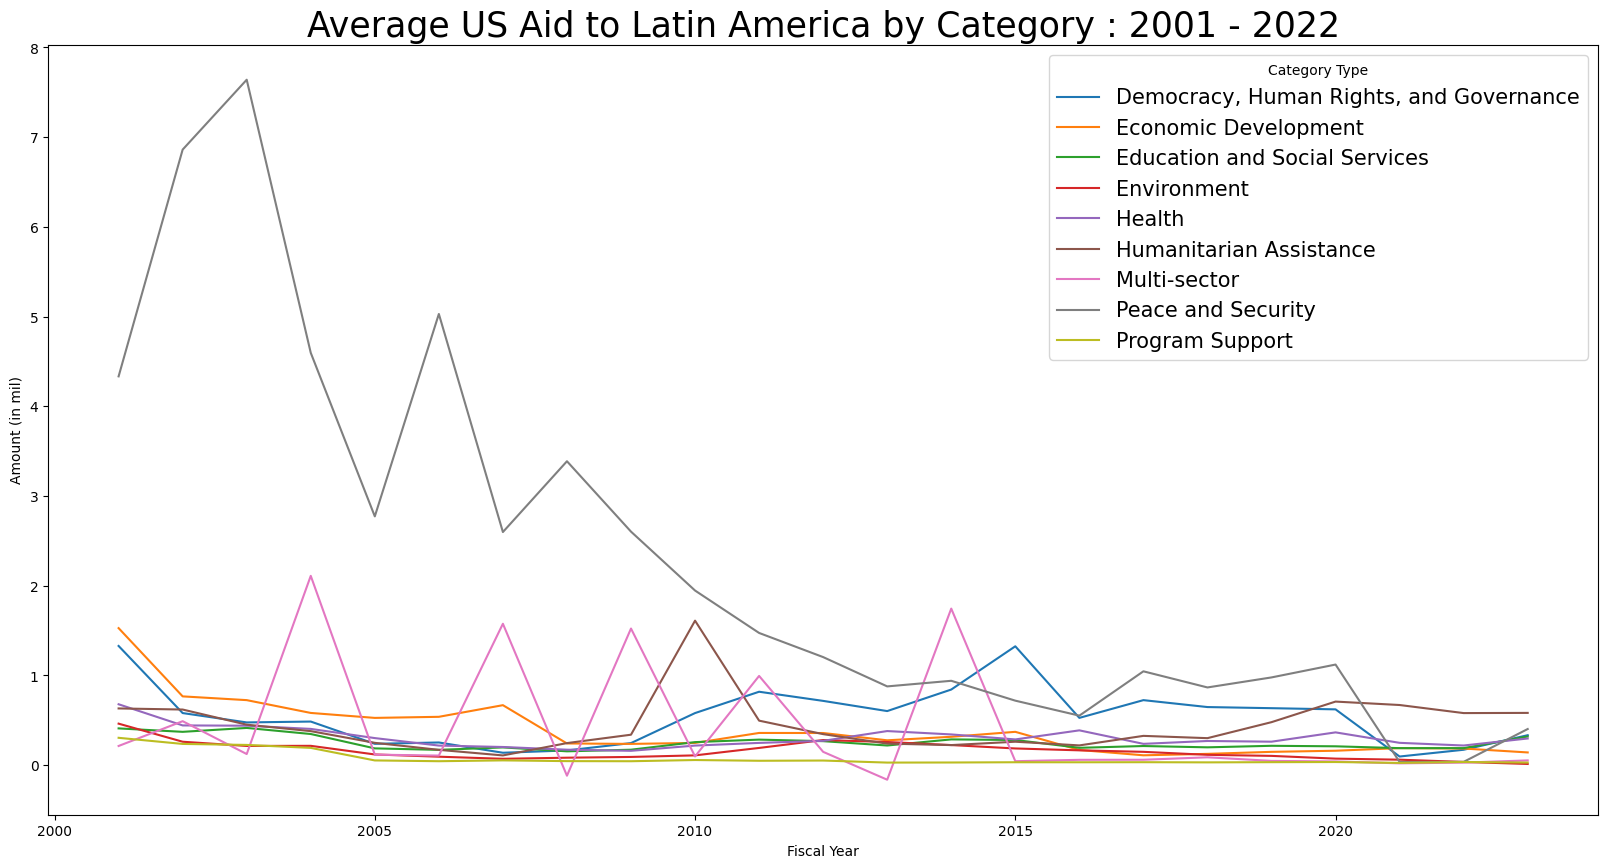

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(y = "amount_in_mil", 
            x = "fiscal_year",
             data = plot_df[(plot_df.region_extd=='Latin America') & (plot_df.fiscal_year>2000)], 
            hue = "us_category_name")
plt.xlabel("Fiscal Year")
plt.ylabel("Amount (in mil)")
plt.legend(loc="best", prop={'size': 15}, title="Category Type")
plt.title("Average US Aid to Latin America by Category : 2001 - 2022", fontsize=25)

# Merging data sets together

In [ ]:
aid_with_codes_df[aid_with_codes_df.region.isin(['Latin America & Caribbean'])]['country_name'].unique()

In [ ]:
filter=tran_inflation_df.region.isin(['Latin America & Caribbean'])
tran_inflation_df_LA = tran_inflation_df[filter]
tran_inflation_df_LA.head()

,country_name,country_code,region,incomegroup,Year,"Inflation, consumer prices (annual %)"
128,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,1999,1.121288
129,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,2000,0.771780
130,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,2001,1.402797
131,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,2002,2.407658
132,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,2003,1.993531


In [ ]:
filter=tran_inflation_df.region.isin(['East Asia & Pacific'])
tran_inflation_df_SEA = tran_inflation_df[filter]
tran_inflation_df_SEA.head()

,country_name,country_code,region,incomegroup,Year,"Inflation, consumer prices (annual %)"
214,Australia,AUS,East Asia & Pacific,High income,1960,3.728814
215,Australia,AUS,East Asia & Pacific,High income,1961,2.287582
216,Australia,AUS,East Asia & Pacific,High income,1962,-0.319489
217,Australia,AUS,East Asia & Pacific,High income,1963,0.641026
218,Australia,AUS,East Asia & Pacific,High income,1964,2.866242


In [ ]:
filter=trans_unemployment_with_codes_df.region.isin(['Latin America & Caribbean'])
trans_unemployment_with_codes_df_LA = trans_unemployment_with_codes_df[filter]
trans_unemployment_with_codes_df_LA.head()

,country_name,country_code,region,incomegroup,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
123,Argentina,ARG,Latin America & Caribbean,Upper middle income,1991,5.440000
124,Argentina,ARG,Latin America & Caribbean,Upper middle income,1992,6.360000
125,Argentina,ARG,Latin America & Caribbean,Upper middle income,1993,10.100000
126,Argentina,ARG,Latin America & Caribbean,Upper middle income,1994,11.760000
127,Argentina,ARG,Latin America & Caribbean,Upper middle income,1995,18.799999


In [ ]:
filter=trans_unemployment_with_codes_df.region.isin(['East Asia & Pacific'])
trans_unemployment_with_codes_df_SEA = trans_unemployment_with_codes_df[filter]
trans_unemployment_with_codes_df_SEA.head()

,country_name,country_code,region,incomegroup,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
185,Australia,AUS,East Asia & Pacific,High income,1991,9.58
186,Australia,AUS,East Asia & Pacific,High income,1992,10.73
187,Australia,AUS,East Asia & Pacific,High income,1993,10.87
188,Australia,AUS,East Asia & Pacific,High income,1994,9.72
189,Australia,AUS,East Asia & Pacific,High income,1995,8.47


In [ ]:
dfs = [tran_inflation_df, trans_unemployment_with_codes_df, trans_povrty_with_codes_df , trans_aid_with_codes_df]

In [ ]:
filter=trans_povrty_with_codes_df.region.isin(['Latin America & Caribbean'])
trans_povrty_with_codes_df_LA = trans_povrty_with_codes_df[filter]
trans_povrty_with_codes_df_LA.head()

,country_name,country_code,region,incomegroup,Year,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)
18,Argentina,ARG,Latin America & Caribbean,Upper middle income,1996,4.2
19,Argentina,ARG,Latin America & Caribbean,Upper middle income,2002,12.4
20,Argentina,ARG,Latin America & Caribbean,Upper middle income,2005,2.6
21,Argentina,ARG,Latin America & Caribbean,Upper middle income,2008,1.6
22,Argentina,ARG,Latin America & Caribbean,Upper middle income,2012,0.6


In [ ]:
filter=trans_povrty_with_codes_df.region.isin(['East Asia & Pacific'])
trans_povrty_with_codes_df_SEA = trans_povrty_with_codes_df[filter]
trans_povrty_with_codes_df_SEA.head()

,country_name,country_code,region,incomegroup,Year,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)
73,Australia,AUS,East Asia & Pacific,High income,2008,0.4
74,Australia,AUS,East Asia & Pacific,High income,2014,0.5
75,Australia,AUS,East Asia & Pacific,High income,2016,0.5
76,Australia,AUS,East Asia & Pacific,High income,2018,0.5
77,Australia,AUS,East Asia & Pacific,High income,1995,0.7


In [ ]:
filter=trans_aid_with_codes_df.region.isin(['Latin America & Caribbean'])
trans_aid_with_codes_df_LA = trans_aid_with_codes_df[filter]
trans_aid_with_codes_df_LA.head()

,country_name,country_code,region,incomegroup,Year,Net official development assistance and official aid received (current US$)
217,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,1973,1.000000e+04
218,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,1974,3.000000e+06
219,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,1975,2.060000e+06
220,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,1976,3.110000e+06
221,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,1977,5.380000e+06


In [ ]:
filter=trans_aid_with_codes_df.region.isin(['East Asia & Pacific'])
trans_aid_with_codes_df_SEA = trans_aid_with_codes_df[filter]
trans_aid_with_codes_df_SEA.head()

,country_name,country_code,region,incomegroup,Year,Net official development assistance and official aid received (current US$)
1104,Brunei Darussalam,BRN,East Asia & Pacific,High income,1960,9999.999776
1105,Brunei Darussalam,BRN,East Asia & Pacific,High income,1961,479999.989271
1106,Brunei Darussalam,BRN,East Asia & Pacific,High income,1962,730000.019073
1107,Brunei Darussalam,BRN,East Asia & Pacific,High income,1963,39999.999106
1108,Brunei Darussalam,BRN,East Asia & Pacific,High income,1964,70000.000298
